<a href="https://colab.research.google.com/github/Equipe16-IAA/IAA012-FrameworksIA/blob/main/01_Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 - Classificação

---

# Exercício 1: Fashion MNIST

#### 1. Importação das bibliotecas

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

---
#### 2. Importação dos dados

In [7]:
from tensorflow import keras
from keras.datasets import fashion_mnist

data = fashion_mnist.load_data()
type(data)

print(data[0])

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

---
#### 3. Visualização dos dados

In [ ]:
# Número de linhas e colunas
data.data.shape

(569, 30)

In [ ]:
# Nomes das categorias
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# Dados em array (valores booleanos)
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
# Nomes dos campos
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

#### 4. Separação da base em Treino e Teste: 75%-25%

In [ ]:
# Criando as variáveis de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.25)

In [ ]:
# Separando linhas e colunas da variável X_train em outras duas variáveis: N - Nº de linhas e D - - Nº de colunas
N, D = X_train.shape

#### 5. Pré-processamento

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 6. Criação do Modelo

In [ ]:
model = tf.keras.models.Sequential(  [
	tf.keras.layers.Input(shape=(D,)),
	tf.keras.layers.Dense(1, activation='sigmoid')
]  )

#### 7. Compilação do Modelo

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### 8. Treinamento do Modelo

In [ ]:
treinamento = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100)

Epoch 1/100
14/14 [==============================] - 6s 82ms/step - loss: 0.9474 - accuracy: 0.3662 - val_loss: 0.8723 - val_accuracy: 0.4615
Epoch 2/100
14/14 [==============================] - 0s 15ms/step - loss: 0.8400 - accuracy: 0.4437 - val_loss: 0.7730 - val_accuracy: 0.5175
Epoch 3/100
14/14 [==============================] - 0s 22ms/step - loss: 0.7446 - accuracy: 0.5305 - val_loss: 0.6922 - val_accuracy: 0.6014
Epoch 4/100
14/14 [==============================] - 0s 22ms/step - loss: 0.6659 - accuracy: 0.6197 - val_loss: 0.6236 - val_accuracy: 0.6853
Epoch 5/100
14/14 [==============================] - 0s 17ms/step - loss: 0.5998 - accuracy: 0.6854 - val_loss: 0.5671 - val_accuracy: 0.7622
Epoch 6/100
14/14 [==============================] - 0s 13ms/step - loss: 0.5434 - accuracy: 0.7300 - val_loss: 0.5216 - val_accuracy: 0.8042
Epoch 7/100
14/14 [==============================] - 0s 19ms/step - loss: 0.4977 - accuracy: 0.7864 - val_loss: 0.4830 - val_accuracy: 0.8462
Epoch 

#### 9. Resultados

In [ ]:
print("Train score: ", model.evaluate(X_train, Y_train))
print("Test score: ", model.evaluate(X_test, Y_test))

14/14 [==============================] - 0s 3ms/step - loss: 0.0952 - accuracy: 0.9789
Train score:  [0.09523139894008636, 0.9788732528686523]
5/5 [==============================] - 0s 3ms/step - loss: 0.0995 - accuracy: 0.9790
Test score:  [0.09950442612171173, 0.9790209531784058]


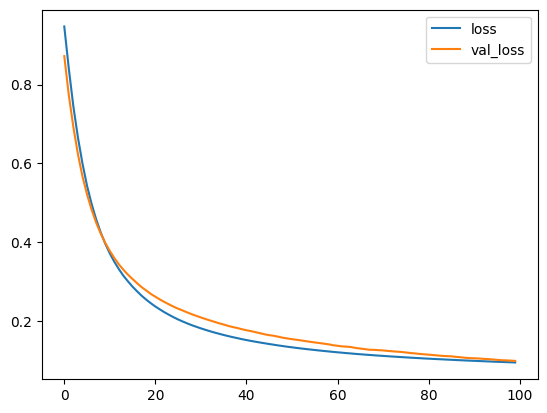

In [ ]:
# Gráficos da Descida do Gradiente
plt.plot(treinamento.history['loss'], label='loss')
plt.plot(treinamento.history['val_loss'], label='val_loss')
plt.legend()

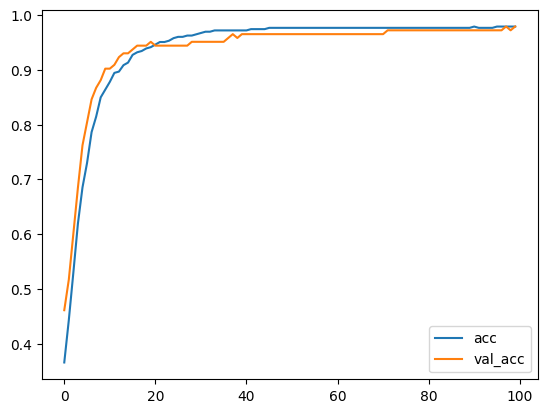

In [ ]:
# Gráficos de Acurácia
plt.plot(treinamento.history['accuracy'], label="acc")
plt.plot(treinamento.history['val_accuracy'], label='val_acc')
plt.legend()

#### 10. Efetuando predições

In [ ]:
pred = model.predict(X_test)
print(pred)

5/5 [==============================] - 0s 2ms/step
[[4.40225005e-02]
 [7.20904052e-01]
 [9.85355020e-01]
 [9.88835275e-01]
 [3.90005989e-05]
 [5.32907784e-01]
 [9.97484088e-01]
 [6.06453941e-05]
 [3.55726570e-01]
 [4.42788769e-05]
 [1.73565022e-05]
 [9.99048054e-01]
 [9.66503978e-01]
 [1.98450863e-01]
 [9.97111320e-01]
 [9.99427736e-01]
 [9.97791886e-01]
 [9.99266088e-01]
 [9.95923400e-01]
 [9.57197964e-01]
 [2.40823701e-02]
 [9.51970935e-01]
 [9.85228956e-01]
 [1.62763223e-02]
 [9.81506824e-01]
 [6.98655320e-04]
 [9.99657512e-01]
 [9.68184710e-01]
 [9.99279201e-01]
 [4.59800102e-02]
 [9.01685655e-01]
 [7.67887682e-02]
 [7.55428731e-01]
 [9.78370547e-01]
 [9.99396563e-01]
 [9.28804576e-01]
 [1.40436050e-05]
 [7.67882774e-03]
 [9.98950839e-01]
 [4.05180156e-02]
 [9.99188840e-01]
 [8.14845920e-01]
 [3.28656510e-02]
 [5.11413515e-02]
 [1.34694418e-02]
 [9.99320269e-01]
 [1.45205914e-03]
 [8.91027987e-01]
 [9.97142494e-01]
 [9.44106162e-01]
 [9.43260372e-01]
 [1.02012707e-02]
 [9.99543190e

In [ ]:
# flatten: transformar em vetor, pois está em matriz (N,1)
pred = np.round(pred).flatten()
print(pred)

[0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.]


#### 11. Cálculo da Acurácia

In [ ]:
print("Acurácia na mão: ", np.mean(pred == Y_test))
print("Evaluate: ", model.evaluate(X_test, Y_test))
print("")
print("Acurácia: ", model.evaluate(X_test, Y_test)[1])

Acurácia na mão:  0.9790209790209791
5/5 [==============================] - 0s 4ms/step - loss: 0.0995 - accuracy: 0.9790
Evaluate:  [0.09950442612171173, 0.9790209531784058]

5/5 [==============================] - 0s 3ms/step - loss: 0.0995 - accuracy: 0.9790
Acurácia:  0.9790209531784058


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

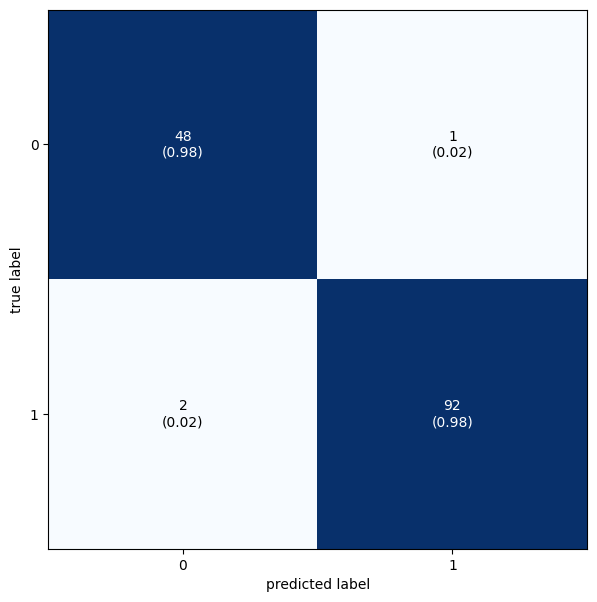

In [ ]:
# Matriz de confusão
cm = confusion_matrix(Y_test, pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7), show_normed=True)

---
# Prática 2: MNIST

#### 1. Importação das bibliotecas

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#### 2. Importação dos dados

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)
print("x_test.shape: ", y_test.shape)
print("y_test.shape: ", y_test.shape)

x_train.shape:  (60000, 28, 28)
y_train.shape:  (60000,)
x_test.shape:  (10000,)
y_test.shape:  (10000,)


In [ ]:
display(x_train)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

#### 3. Pré-processamento

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0

#### 4. Criação do modelo

In [ ]:
i = tf.keras.layers.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(i)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.models.Model(i, x)

#### 5. Compilação e treinamento do modelo

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model.fit(x_train,
              y_train,
              validation_data=(x_test, y_test),
              epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2974 - accuracy: 0.9128 - val_loss: 0.1514 - val_accuracy: 0.9543
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1426 - accuracy: 0.9577 - val_loss: 0.0982 - val_accuracy: 0.9718
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1087 - accuracy: 0.9667 - val_loss: 0.0865 - val_accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0889 - accuracy: 0.9728 - val_loss: 0.0796 - val_accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0739 - accuracy: 0.9770 - val_loss: 0.0764 - val_accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0648 - accuracy: 0.9788 - val_loss: 0.0700 - val_accuracy: 0.9789
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0583 - accuracy: 0.9812 - val_loss: 0.0708 - val_accuracy:

#### 6. Avaliação do modelo

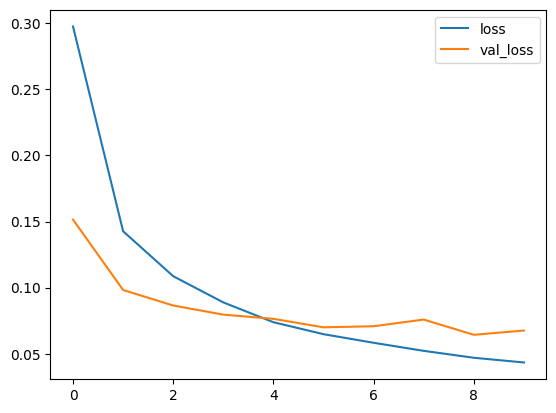

In [ ]:
# Plotar a função de perda
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

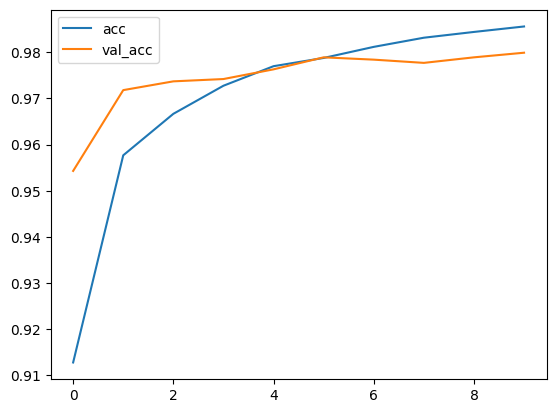

In [ ]:
# Plotar a acurácia
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

In [ ]:
# Avaliar o modelo com a base de teste
print( model.evaluate(x_test, y_test) )

313/313 [==============================] - 1s 2ms/step - loss: 0.0676 - accuracy: 0.9799
[0.06759855151176453, 0.9799000024795532]


#### 7. Predições

In [ ]:
y_pred = model.predict(x_test).argmax(axis=1)
print(y_pred)

313/313 [==============================] - 1s 2ms/step
[7 2 1 ... 4 5 6]


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

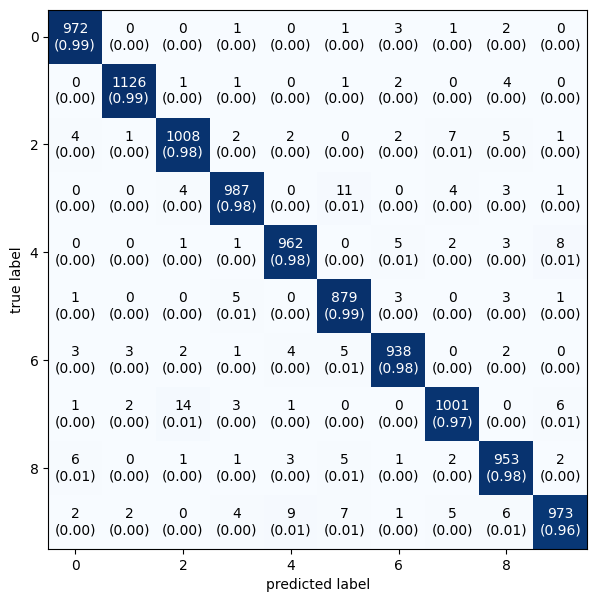

In [ ]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7),
                      show_normed=True)

#### 8. Mostrar algumas classificações erradas

In [ ]:
misclassified = np.where(y_pred != y_test)[0]

i = np.random.choice(misclassified)

Text(0.5, 1.0, 'True label: 7 Predicted: 2')

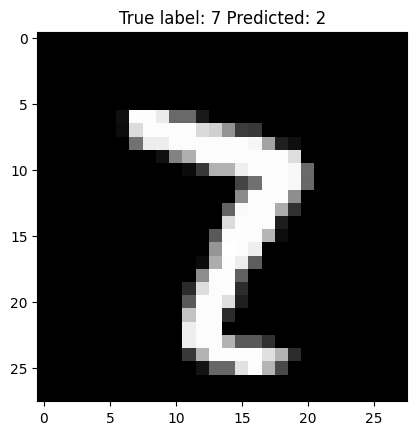

In [ ]:
plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (y_test[i], y_pred[i]))

---

# Fim do código